# Exercici 1
## Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Voy a verificar el encoding de el archivo porque me da error.

In [2]:
import csv
data = open("C:/Users/alpid/Downloads/Lligues_europees_UEFA.csv","r") 
data

<_io.TextIOWrapper name='C:/Users/alpid/Downloads/Lligues_europees_UEFA.csv' mode='r' encoding='cp1252'>

Veo que es encoding cp1252

In [3]:
df = pd.read_csv("C:/Users/alpid/Downloads/Lligues_europees_UEFA.csv", encoding='cp1252', sep=";", )
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


No es necesario para el ejercicio pero en la web: [https://fbref.com/en/comps/Big5/Big-5-European-Leagues-Stats#all_rank_key] encuentro al definición de las columnas:  
    Rk -- Index de filas  
    Country -- Pais  
    LgRk -- Leage ranking-clasificación en la liga  
    MP -- Matches Played-partidos jugados  
    W -- Wins-partidos ganados  
    D -- Draws-empates  
    L -- Losses-partidos perdidos  
    GF -- Goles a favor  
    GA -- Goals Against-goles en contra  
    GD -- Goal Difference-diferencia de goles o gol average  
    Pts -- Points-puntos (3 por ganar, 1 por empate)  
    Pts/MP -- Points/Mtches played-puntos por partido jugado    
    xG -- Expected Goals-goles esperados  
    xGA -- xG Allowed- probabilidad de goles en contra  
    xGD -- xG Difference - probabilidad de diferencia de goles 
    xGD/90 -- xG Difference/90 Minutos- probabilidad de difenrecia de goles por partido  
    Last 5 -- Last Five Matches - ultimos 5 partidos jugados ordenados cornologicamente de izq a derecha  
    Attendance -- Attendance/Game  - asistencia por partido
    Top Team Scorer -- Only includes league matches for that season  - máximo goleador por equipo
    Goalkeeper -- Goalkeeper with the most minutes in league play  - portero titular

### Haré un par de sanity checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
df.isna().all()

Rk                 False
Squad              False
Country            False
LgRk               False
MP                 False
W                  False
D                  False
L                  False
GF                 False
GA                 False
GD                 False
Pts                False
Pts/G              False
xG                 False
xGA                False
xGD                False
xGD/90             False
Last 5             False
Attendance         False
Top Team Scorer    False
Goalkeeper         False
dtype: bool

### Verificación de rechazo de hipotesis nula de un atributo (utilizaré shapiro, pero podría utilizas Fisher tambien, siendo que el primero verifica si son gaussianas y el segundo si las varianza son homogéneas para caracterizar si son cercanas a una distribución normal con un % de confianza (=1-alfa):

Tomamos una columna, p.e. los partidos ganados (columna W) y comprobamos si sigue una distribución gausiana, es decir:  
H0: "La distribución de partidos ganados W sigue una distribución de Gauss"  
H1: "La distribución de partidos ganadas W no sigue una distribución de Gauss"

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(df["W"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Prbablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.965, p=0.011
Probabllemente no es Gaussiana,
hay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%


Haremos un histograma y un QQplot para comprobarlo visualmente (no es necesario pero lo haré en todas porque aydua visualmente a entender)

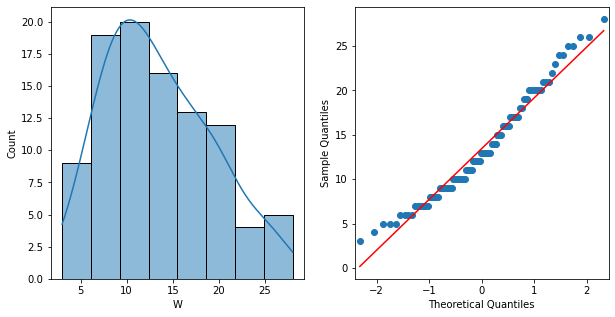

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["W"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["W"], line ="s", ax=ax2)
plt.show()

Efectivamente observamos que es una distribución sesgada hacia la derecha, y por tanto no Gaussiana, pudiendo rechazar la hipótesis nula con un 95% de confianza, de modo que deberíamos aplciar pruebas no paramétricas.

Veamos ahora la distribucion de la diferencia de goles GD:

In [8]:
from scipy.stats import shapiro
stat, p = shapiro(df["GD"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.986, p=0.396
Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula


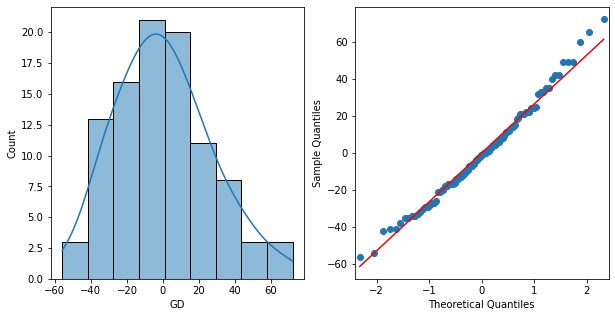

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["GD"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["GD"], line ="s", ax=ax2)
plt.show()

En este caso, no podemos rechazar la hipótesis nula con lo que probabemente la muestra tenga una distribución aproximadamente gausianna (como se ve en los gáficos u confirma el analiss Shapiro, con un nivel de confianza del 95% (1-alfa), que nos permite aplicar pruebas paramétricas.

# Exercici 2
## Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%

Para realizar el analisis primero tengo que ver si las muestras de los atributos son Gausianas, o no, pues si lo son puedo aplicar test paramétricos, y sino test no paramétricos entre ellas.

### Test paramétrico: Primero tomaré dos que sean gaussianas con un 95% de confianza:

In [10]:
from scipy.stats import shapiro
stat, p = shapiro(df["D"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.977, p=0.081
Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula


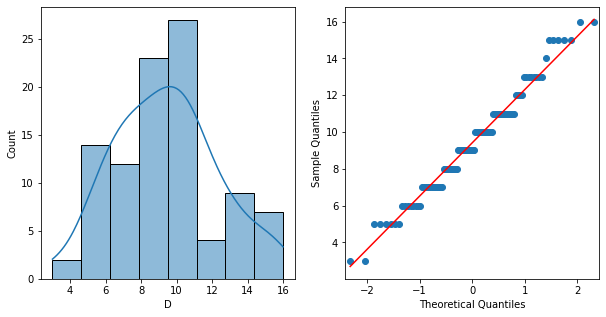

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["D"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["D"], line ="s", ax=ax2)
plt.show()

Verificaré con un Sutdent t-test si las muestras GD y D tienen medias similares aplicando Pruebas paramétricas:  
H0 : Las muestras tienen medias similares  
H1: no tienen muestras similares  
alpha: 0.05 (5%)  

In [12]:
# Student's t-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(df["GD"], df["D"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Tienen medias similares')
else:
 print('No tienen medias similares')

stat=-3.493, p=0.001
No tienen medias similares



### Test no paramétrico: Segundo tomaré dos que no sean gaussianas con un 95% de confianza y por tanto que requieran tests no paramétricos

Selecciono los Puntos y los partidos jugados a ver si son no gaussianas y verificaré si tiene alguna relación como distribución.

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(df["Pts"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.972, p=0.035
Probabllemente no es Gaussiana,
hay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%


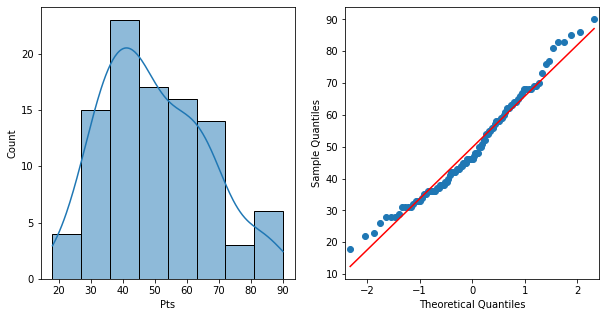

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["Pts"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["Pts"], line ="s", ax=ax2)
plt.show()

In [15]:
from scipy.stats import shapiro
stat, p = shapiro(df["MP"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.605, p=0.000
Probabllemente no es Gaussiana,
hay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%


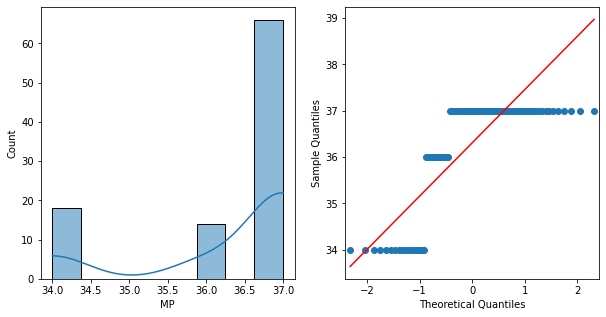

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["MP"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["MP"], line ="s", ax=ax2)
plt.show()

Como ambas son no gaussianas con un 95% de confianza, aplico un metodo no paramétrico para ver si sus muestras parten de distribuciones similares utilizando el test Mann-Whitney U

In [17]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df["Pts"], df["MP"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente son distribuciones similares')
else:
 print('Probablemente son distribuciones diferentes')

stat=7356.000, p=0.000
Probablemente son distribuciones diferentes


Como podemos ver, el test nos confirma lo que vemos por graficos.

# Exercici 3
## Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Igual que antes, selecccioanré tres atributos donde las muestras sean probáblemente gausianas para aplicar test paramétrico y probáblemente no gaussianas para aplicar test no paramétricos

### Test paramétrico:
Busco una muestra que cumpla el test de Saphiro y con GD y D hago el test de ANOVA (análisis of Variance).

In [18]:
from scipy.stats import shapiro
stat, p = shapiro(df["L"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.988, p=0.558
Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula


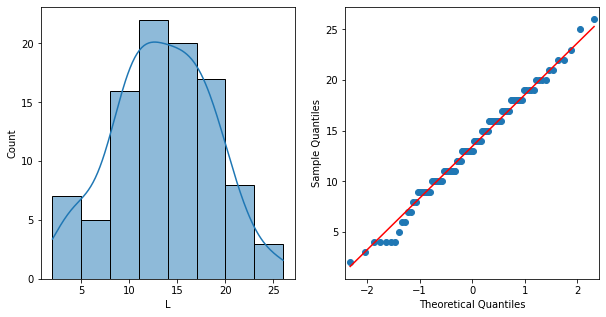

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["L"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["L"], line ="s", ax=ax2)
plt.show()

Aplico el test Anova para comprobar si las distribuciones D, GD y L son signifcativamente similares.

In [20]:
# Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(df["D"], df["GD"], df["L"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente siguen la misma distribución')
else:
 print('Probablemente no siguen la misma distribución')

stat=18.995, p=0.000
Probablemente no siguen la misma distribución


### Test no paramétrico:
Busco una muestra que no cumpla el test de Saphiro y con MP y Pts hago el test de Friedman.

In [21]:
from scipy.stats import shapiro
stat, p = shapiro(df["W"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print("Probablemente es Gaussiana, no hay datos suficientes para rechazar la hipótesis nula")
else:
 print("Probabllemente no es Gaussiana,\nhay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%")

stat=0.965, p=0.011
Probabllemente no es Gaussiana,
hay suficientes datos para rechazar la hipótesis nula con un un nivel de confianza del 95%, es decir un alfa del 5%


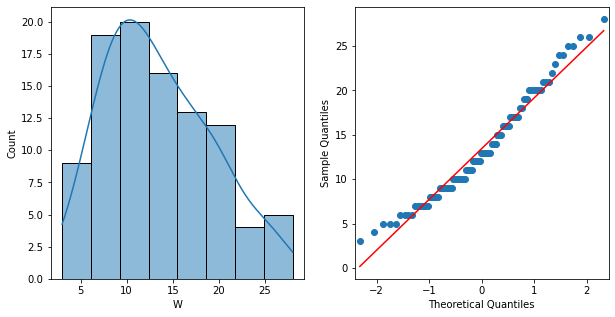

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#histograma
sns.histplot(df["W"], kde=True, ax=ax1)
# QQ Plot
sm.qqplot(df["W"], line ="s", ax=ax2)
plt.show()

Aplico el test de Friedman para comprobar si las distribuciones MP, Pts y W son signifcativamente similares.

In [23]:
# Friedman Test
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(df["MP"], df["Pts"], df["W"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probablemente la misma distribución')
else:
 print('Probablemente distribuciones distintas')

stat=160.478, p=0.000
Probablemente distribuciones distintas
